In [ ]:
from GooglePlacesCategoriesFireCloudETL import GoogleMapsAPICategories_toFireCloud
from IPython import display

API_KEY = "YOUR API KEY"
Firebase_Admin_SDK = "Your Firebase Admin SDK"

#Create search categories and subcategories
categories = [('1_Must_See_Attractions', ['tourist_attraction','point_of_interest'], None),
 ('2_Historical_Buildings_Heritage_Monuments', ['city_hall', 'library', 'university', 'town_square'],
  ['historical landmark']),
 ('3_Museums_Arts', ['museum', 'art_gallery'], None),
 ('4_Localities_&_Neighboorhoods', ['colloquial_area', 'locality','neighborhood', 'town_square'],None),
 ('5_Nature_&_Parks', ['park', 'natural_feature'],['Garden']),
 ('6_Entertainment', ['amusement_park', 'aquarium', 'casino', 'stadium', 'movie_theater'],None),
 ('7_Performing_Arts', None, ['Theatres', 'Concert hall', 'Opera House']),
 ('8_Religion', ['church', 'hindu_temple', 'mosque', 'synagogue', 'place_of_worship'],None),
 ('9_Spas_&_Wellness', ['Spa'], None),
 ('10_Food_&_Beverages', ['bakery', 'bar', 'cafe', 'meal_takeaway', 'restaurant', 'supermarket', 'food'],
  ['Pastries', 'Fast Food', 'Patisserie', 'Ice cream shop']),
 ('11_Shopping', ['clothing_store', 'department_store', 'jewelry_store','shoe_store', 'shopping_mall', 'store'],
  None),
 ('12_Nightlife', ['night_club'],
  ['electronic music club', 'techno club', 'house club', 'Jazz Club', 'Rock Club',
   'Piano Bar', 'R&B Club', 'Gay Bar'])]


#Define the place
country = 'Spain'
city = 'Madrid'
area_km2 = 604.3

#Extract the data from Google Maps and Write it into FireCloud
GoogleMapsAPICategories_toFireCloud(API_KEY, Firebase_Admin_SDK, categories, country, city, area_km2)

#Enrich the data with fields extracted from Sygic API
Sygic_API_KEY = "YOUR Sygic API KEY"
keys_list = ["admission"]
Firestore_cllction_path = "Countries/Spain/Madrid/3_Museums_Arts/art_gallery"

sygic_details = SygicDetailsPipeline(Firebase_Admin_SDK, Firestore_cllction_path, Sygic_API_KEY, keys_list=keys_list)

field_name = "Sygic_Results"
Update_FireCloud_Documents_fields(Firebase_Admin_SDK, Firestore_cllction_path, sygic_details, field_name)


The produced Firestore database should look like below

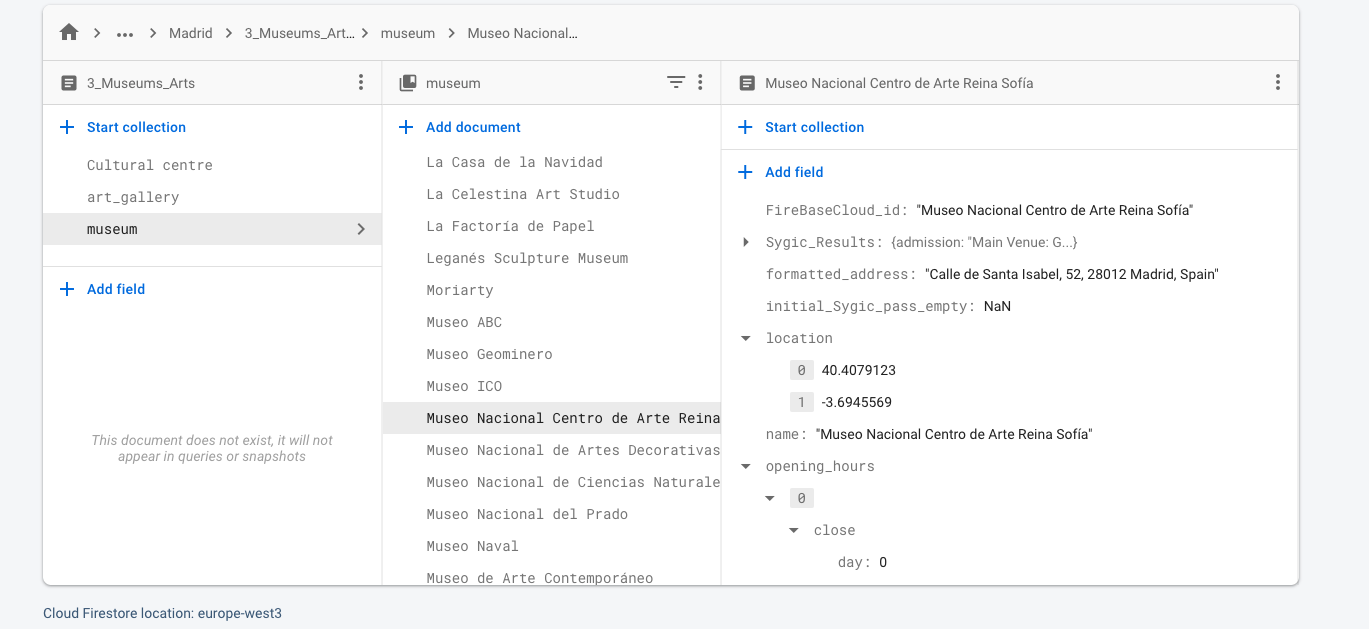

In [8]:
display.Image("Firestore.png")